## EU ETS (2013-2020) Dashboard - Data Wrangling Notebook

Source: https://www.eea.europa.eu/data-and-maps/data/european-union-emissions-trading-scheme-17

*The objective of this notebook is to prepare the EU ETS Data to use it in Tableau Public*

### 0) Importing Libraries:

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

#Visualization
!pip install plotly
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Geospatial mapping
import plotly.express as px
!pip install pydeck
import pydeck as pdk

### 1) Data Import: 

In [3]:
# Import Data downloaded from: https://www.eea.europa.eu/data-and-maps/data/european-union-emissions-trading-scheme-16
ETS = '/Users/brunoluis/Jupyter/Projects /EU ETS DATA/ETS_Database_v49_Jul22.csv'
Data = pd.read_csv(ETS , sep='\t')

### 2) Data Exploration: 

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77079 entries, 0 to 77078
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    77079 non-null  object 
 1   country_code               77079 non-null  object 
 2   ETS information            77079 non-null  object 
 3   main activity sector name  77079 non-null  object 
 4   unit                       77079 non-null  object 
 5   value                      77079 non-null  float64
 6   year                       77079 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.1+ MB


In [5]:
Data.head()

,country,country_code,ETS information,main activity sector name,unit,value,year
0,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,498797.0,2005
1,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,383157.0,2013
2,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,351210.0,2017
3,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,335835.0,2018
4,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,299741.0,2021


In [6]:
Data[['main activity sector name']].value_counts()

main activity sector name                                  
20-99 All stationary installations                             6790
10 Aviation                                                    5449
20 Combustion of fuels                                         4765
21-99 All industrial installations (excl. combustion)          4411
29 Production of cement clinker                                4277
32 Manufacture of ceramics                                     4107
31 Manufacture of glass                                        4045
36 Production of paper or cardboard                            3812
30 Production of lime, or calcination of dolomite/magnesite    3808
24  Production of pig iron or steel                            3607
21  Refining of mineral oil                                    3521
33 Manufacture of mineral wool                                 2800
25 Production or processing of ferrous metals                  2759
42 Production of bulk chemicals                         

In [7]:
Data[['year']].value_counts()

year                            
Total 2nd trading period (08-12)    3969
2012                                3928
2009                                3799
2008                                3798
2010                                3797
2011                                3795
Total 3rd trading period (13-20)    3728
2020                                3695
2019                                3603
2018                                3586
2017                                3579
2016                                3578
2014                                3569
Total 1st trading period (05-07)    3565
2015                                3564
2013                                3552
2007                                3549
Total 4th trading period (21-30)    3427
2021                                3426
2006                                3299
2005                                3288
2022                                 985
dtype: int64

In [8]:
Data[['country']].value_counts()

country                  
Germany                      4161
Spain                        3888
France                       3623
Sweden                       3340
Poland                       3282
Italy                        3281
United Kingdom (excl. NI)    3248
Belgium                      3197
Hungary                      3163
Finland                      3163
Netherlands                  3100
Austria                      3091
Czechia                      2902
Romania                      2856
Slovakia                     2829
Portugal                     2630
Greece                       2586
Bulgaria                     2482
Slovenia                     2345
Norway                       2310
Latvia                       2056
Lithuania                    2030
Estonia                      1974
Denmark                      1972
Ireland                      1669
Croatia                      1580
Luxembourg                   1419
Cyprus                        964
Iceland               

<AxesSubplot:xlabel='value', ylabel='main activity sector name'>

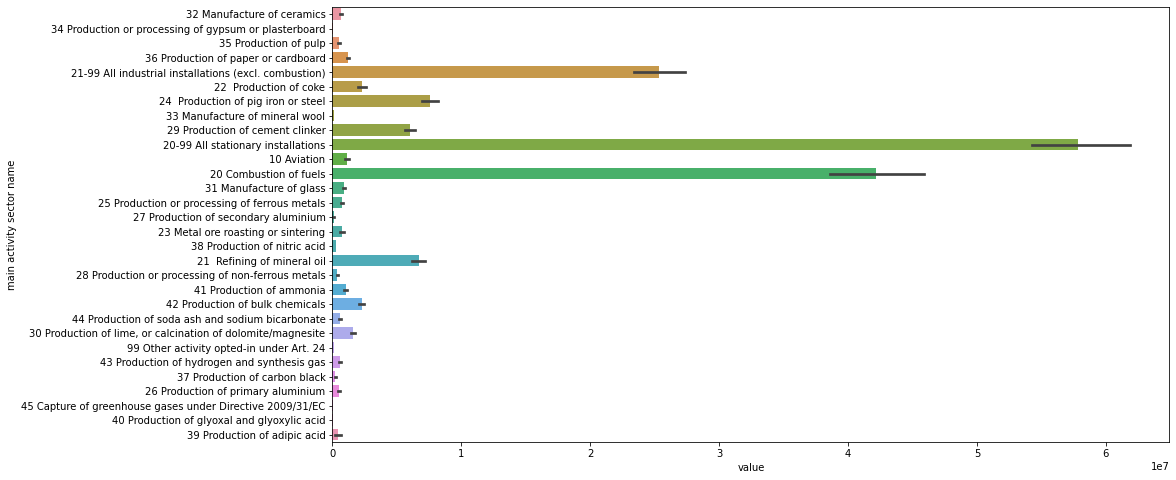

In [9]:
# Let's plot some curves
plt.figure(figsize=(15,8))
sns.barplot(y = 'main activity sector name', x = 'value', data = Data)

<AxesSubplot:xlabel='value', ylabel='country'>

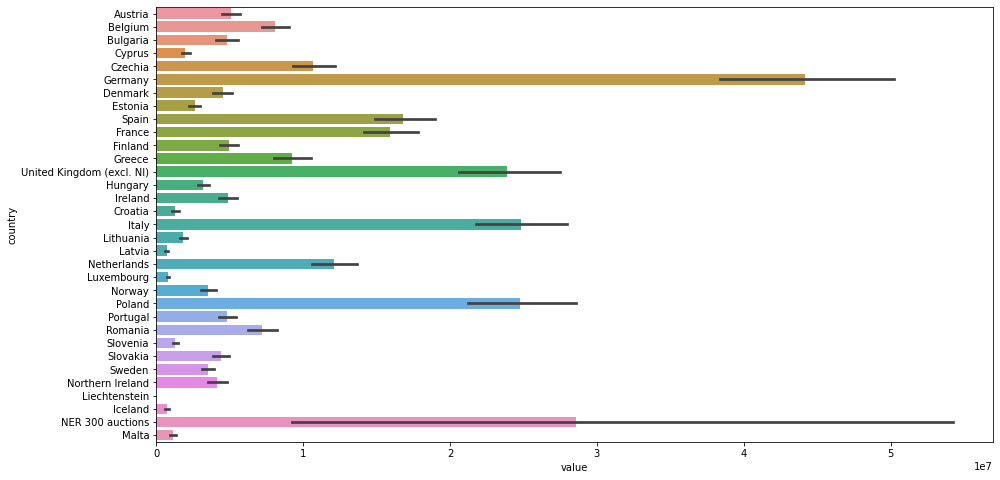

In [10]:
# Let's plot some curves
plt.figure(figsize=(15,8))
sns.barplot(y = 'country', x = 'value', data = Data)

In [11]:
#Percentage of null values in the columns 
round((Data.isnull().sum()/len(Data)*100),2)

country                      0.0
country_code                 0.0
ETS information              0.0
main activity sector name    0.0
unit                         0.0
value                        0.0
year                         0.0
dtype: float64

In [12]:
# Database seems already prepared for explotation. 

In [14]:
# Import Data downloaded from: https://www.eea.europa.eu/data-and-maps/data/european-union-emissions-trading-scheme-16
LL = '/Users/brunoluis/Jupyter/Projects /EU ETS DATA/COUNTRIES_LAT_LON.csv'
Data2 = pd.read_csv(LL , sep='\t')

In [15]:
Data2.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [16]:
Data2 = Data2.drop('name', axis = 1)
Data2

,country,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.939110,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615
...,...,...,...
240,YE,15.552727,48.516388
241,YT,-12.827500,45.166244
242,ZA,-30.559482,22.937506
243,ZM,-13.133897,27.849332


In [17]:
DATA = Data2.merge(Data, left_on = 'country', right_on = 'country_code')

In [18]:
DATA

,country_x,latitude,longitude,country_y,country_code,ETS information,main activity sector name,unit,value,year
0,AT,47.516231,14.550072,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,498797.0,2005
1,AT,47.516231,14.550072,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,383157.0,2013
2,AT,47.516231,14.550072,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,351210.0,2017
3,AT,47.516231,14.550072,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,335835.0,2018
4,AT,47.516231,14.550072,Austria,AT,1.1 Freely allocated allowances,32 Manufacture of ceramics,tonne of CO2 equ.,299741.0,2021
...,...,...,...,...,...,...,...,...,...,...
76715,SK,48.669026,19.699024,Slovakia,SK,4. Total surrendered units,21-99 All industrial installations (excl. comb...,tonne of CO2 equ.,109146151.0,Total 3rd trading period (13-20)
76716,SK,48.669026,19.699024,Slovakia,SK,1.1 Freely allocated allowances,24 Production of pig iron or steel,tonne of CO2 equ.,54706594.0,Total 2nd trading period (08-12)
76717,SK,48.669026,19.699024,Slovakia,SK,1.1 Freely allocated allowances,25 Production or processing of ferrous metals,tonne of CO2 equ.,324244.0,Total 2nd trading period (08-12)
76718,SK,48.669026,19.699024,Slovakia,SK,2. Verified emissions,26 Production of primary aluminium,tonne of CO2 equ.,131029.0,Total 2nd trading period (08-12)


In [19]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76720 entries, 0 to 76719
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country_x                  76720 non-null  object 
 1   latitude                   76720 non-null  float64
 2   longitude                  76720 non-null  float64
 3   country_y                  76720 non-null  object 
 4   country_code               76720 non-null  object 
 5   ETS information            76720 non-null  object 
 6   main activity sector name  76720 non-null  object 
 7   unit                       76720 non-null  object 
 8   value                      76720 non-null  float64
 9   year                       76720 non-null  object 
dtypes: float64(3), object(7)
memory usage: 6.4+ MB


In [21]:
DATA.to_csv('/Users/brunoluis/Jupyter/Projects /EU ETS DATA/ETS_DATA.csv')